In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


In [2]:
df= pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [3]:
df.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [4]:
import seaborn as sns
sns.set()

In [5]:
missed=pd.DataFrame(df.isnull().sum()/len(df)*100)


<Axes: title={'center': '% of missed values'}, xlabel='varialble', ylabel='%'>

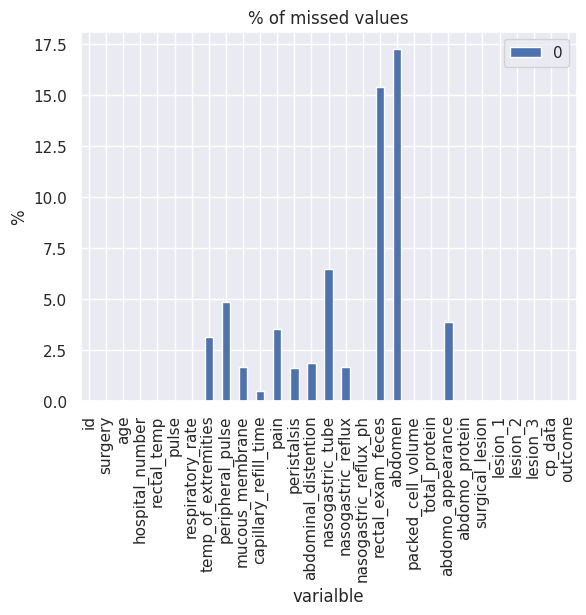

In [6]:
missed.plot(kind="bar",title="% of missed values",ylabel="%",xlabel="varialble")

In [7]:
#dataframe shape
df.shape

(1235, 29)

In [8]:
df.drop(['abdomen','rectal_exam_feces'],axis=1,inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [11]:
df.drop(['surgical_lesion','lesion_2','lesion_3','cp_data'],axis=1,inplace=True)

In [12]:
df[df.duplicated()].size

0

In [13]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,lesion_1,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,slight,slight,less_1_liter,6.5,57.0,8.5,serosanguious,3.4,2209,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,moderate,none,more_1_liter,2.0,33.0,64.0,serosanguious,2.0,2208,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,moderate,slight,none,3.5,37.0,6.4,serosanguious,3.4,5124,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,moderate,slight,more_1_liter,2.0,53.0,7.0,cloudy,3.9,2208,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,none,slight,less_1_liter,7.0,47.0,7.3,cloudy,2.6,0,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,moderate,none,more_1_liter,2.0,57.0,66.0,serosanguious,2.0,2206,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,slight,slight,none,3.0,35.0,6.4,serosanguious,3.6,2209,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,slight,slight,none,3.0,40.0,5.9,cloudy,7.0,400,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,slight,none,more_1_liter,2.0,58.0,74.0,cloudy,2.0,2209,lived


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1234
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     996 non-null    int64  
 1   surgery                996 non-null    object 
 2   age                    996 non-null    object 
 3   hospital_number        996 non-null    int64  
 4   rectal_temp            996 non-null    float64
 5   pulse                  996 non-null    float64
 6   respiratory_rate       996 non-null    float64
 7   temp_of_extremities    996 non-null    object 
 8   peripheral_pulse       996 non-null    object 
 9   mucous_membrane        996 non-null    object 
 10  capillary_refill_time  996 non-null    object 
 11  pain                   996 non-null    object 
 12  peristalsis            996 non-null    object 
 13  abdominal_distention   996 non-null    object 
 14  nasogastric_tube       996 non-null    object 
 15  nasogastri

In [15]:
s=df["surgery"].unique()
a=df["age"].unique()
tempEx=df["temp_of_extremities"].unique()
pp=df["peripheral_pulse"].unique()
mm=df["mucous_membrane"].unique()
crt=df["capillary_refill_time"].unique()
pain=df["pain"].unique()
pl=df["peristalsis"].unique()
ad=df["abdominal_distention"].unique()
nt=df["nasogastric_tube"].unique()
nr=df["nasogastric_reflux"].unique()
aa=df["abdomo_appearance"].unique()

# display of the values of the variable
print(f"values of surgey variable are:{s}")
print("*"*50) 
print(f"values of age variable are:{a}")
print("*"*50) 
print(f"values of temp_of_extremities variable are:{tempEx}")
print("*"*50) 
print(f"values of peripheral_pulse variable are:{pp}")
print("*"*50) 
print(f"values of mucous_membrane variable are:{mm}")
print("*"*50) 
print(f"values of capillary_refill_time variable are:{crt}")
print("*"*50) 
print(f"values of pain variable are:{pain}")
print("*"*50) 
print(f"values of peristalsis variable are:{pl}")
print("*"*50) 
print(f"values of abdominal_distention variable are:{ad}")
print("*"*50) 
print(f"values of nasogastric_tube variable are:{nt}")
print("*"*50) 
print(f"values of nasogastric_reflux variable are:{nr}")
print("*"*50) 
print(f"values of abdomo_appearance variable are:{aa}")

values of surgey variable are:['yes' 'no']
**************************************************
values of age variable are:['adult' 'young']
**************************************************
values of temp_of_extremities variable are:['cool' 'cold' 'normal' 'warm']
**************************************************
values of peripheral_pulse variable are:['reduced' 'normal' 'absent' 'increased']
**************************************************
values of mucous_membrane variable are:['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red']
**************************************************
values of capillary_refill_time variable are:['more_3_sec' 'less_3_sec' '3']
**************************************************
values of pain variable are:['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain']
**************************************************
values of peristalsis variable are:['absent' 'hypomotile' 'normal' 'hypermotile' 'distend_small']
*****

In [16]:
correctedVal={
    "surgery":{"yes":1,"no":0},
    "age":{"adult":2, "young":1},
    "temp_of_extremities":{"cool":0 ,"cold":1 ,"normal":2 ,"warm":3 },
    "peripheral_pulse":{"reduced":0 ,"normal":1 ,"absent":2 ,"increased":3},
    "mucous_membrane":{"dark_cyanotic":0 ,"pale_cyanotic":1 ,"pale_pink":2 ,"normal_pink":3 ,"bright_pink":4 ,"bright_red":5},
    "capillary_refill_time":{"more_3_sec":0 ,"less_3_sec":1 ,"3":2},
    "pain":{"depressed":0 ,"mild_pain":1 ,"extreme_pain":2 ,"alert":3 ,"severe_pain":4},
    "peristalsis":{"absent":0 ,"hypomotile":1 ,"normal":2 ,"hypermotile":3 ,"distend_small":4},
    "abdominal_distention":{"slight":0 ,"moderate":1 ,"none":2 ,"severe":3},
    "nasogastric_tube":{"slight":0 ,"none":1 ,"significant":2},
    "nasogastric_reflux":{"less_1_liter":0 ,"more_1_liter":1 ,"none":2 ,"slight":3},
    "abdomo_appearance":{"serosanguious":0 ,"cloudy":1 ,"clear":2}
}
df.replace(correctedVal,inplace=True)
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,lesion_1,outcome
0,0,1,2,530001,38.1,132.0,24.0,0,0,0,...,0,0,0,6.5,57.0,8.5,0,3.4,2209,died
1,1,1,2,533836,37.5,88.0,12.0,0,1,1,...,1,1,1,2.0,33.0,64.0,0,2.0,2208,euthanized
2,2,1,2,529812,38.3,120.0,28.0,0,0,2,...,1,0,2,3.5,37.0,6.4,0,3.4,5124,lived
3,3,1,2,5262541,37.1,72.0,30.0,1,0,2,...,1,0,1,2.0,53.0,7.0,1,3.9,2208,lived
4,4,0,2,5299629,38.0,52.0,48.0,2,1,3,...,2,0,0,7.0,47.0,7.3,1,2.6,0,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,1,2,535246,38.5,129.0,48.0,0,0,2,...,1,1,1,2.0,57.0,66.0,0,2.0,2206,lived
1231,1231,1,2,528570,37.5,60.0,50.0,0,0,1,...,0,0,2,3.0,35.0,6.4,0,3.6,2209,died
1232,1232,1,1,529685,37.5,84.0,40.0,2,0,3,...,0,0,2,3.0,40.0,5.9,1,7.0,400,lived
1233,1233,1,2,534784,38.1,70.0,16.0,2,0,5,...,0,1,1,2.0,58.0,74.0,1,2.0,2209,lived


In [17]:
df.drop(["hospital_number"],axis=1,inplace=True)
df


,id,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,lesion_1,outcome
0,0,1,2,38.1,132.0,24.0,0,0,0,0,...,0,0,0,6.5,57.0,8.5,0,3.4,2209,died
1,1,1,2,37.5,88.0,12.0,0,1,1,0,...,1,1,1,2.0,33.0,64.0,0,2.0,2208,euthanized
2,2,1,2,38.3,120.0,28.0,0,0,2,1,...,1,0,2,3.5,37.0,6.4,0,3.4,5124,lived
3,3,1,2,37.1,72.0,30.0,1,0,2,0,...,1,0,1,2.0,53.0,7.0,1,3.9,2208,lived
4,4,0,2,38.0,52.0,48.0,2,1,3,1,...,2,0,0,7.0,47.0,7.3,1,2.6,0,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,1,2,38.5,129.0,48.0,0,0,2,0,...,1,1,1,2.0,57.0,66.0,0,2.0,2206,lived
1231,1231,1,2,37.5,60.0,50.0,0,0,1,1,...,0,0,2,3.0,35.0,6.4,0,3.6,2209,died
1232,1232,1,1,37.5,84.0,40.0,2,0,3,1,...,0,0,2,3.0,40.0,5.9,1,7.0,400,lived
1233,1233,1,2,38.1,70.0,16.0,2,0,5,1,...,0,1,1,2.0,58.0,74.0,1,2.0,2209,lived


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1234
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     996 non-null    int64  
 1   surgery                996 non-null    int64  
 2   age                    996 non-null    int64  
 3   rectal_temp            996 non-null    float64
 4   pulse                  996 non-null    float64
 5   respiratory_rate       996 non-null    float64
 6   temp_of_extremities    996 non-null    int64  
 7   peripheral_pulse       996 non-null    int64  
 8   mucous_membrane        996 non-null    int64  
 9   capillary_refill_time  996 non-null    int64  
 10  pain                   996 non-null    int64  
 11  peristalsis            996 non-null    int64  
 12  abdominal_distention   996 non-null    int64  
 13  nasogastric_tube       996 non-null    int64  
 14  nasogastric_reflux     996 non-null    int64  
 15  nasogastri

In [19]:
df=df.values

In [20]:
df.shape
x_train=df[:,0:20]
y_train=df[:,21]

In [21]:
x_train[1]

array([1, 1, 2, 37.5, 88.0, 12.0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2.0, 33.0,
       64.0, 0, 2.0], dtype=object)

****Preparation of Test Set*******

In [22]:
dfTest=pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")
dfTest

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [23]:
dfTest.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [24]:
dfTest.drop(['abdomen','rectal_exam_feces'],axis=1,inplace=True)


In [25]:
dfTest.shape

(824, 26)

In [26]:
dfTest.drop(['surgical_lesion','lesion_2','lesion_3','cp_data'],axis=1,inplace=True)

In [27]:
dfTest.shape

(824, 22)

In [28]:
dfTest[dfTest.duplicated()].size

0

In [29]:
dfTest.shape

(824, 22)

In [30]:
dfTest.isnull().sum()

id                        0
surgery                   0
age                       0
hospital_number           0
rectal_temp               0
pulse                     0
respiratory_rate          0
temp_of_extremities      35
peripheral_pulse         47
mucous_membrane          13
capillary_refill_time     6
pain                     29
peristalsis              19
abdominal_distention     22
nasogastric_tube         64
nasogastric_reflux       14
nasogastric_reflux_ph     0
packed_cell_volume        0
total_protein             0
abdomo_appearance        31
abdomo_protein            0
lesion_1                  0
dtype: int64

In [31]:
s=dfTest["surgery"].unique()
a=dfTest["age"].unique()
tempEx=dfTest["temp_of_extremities"].unique()
pp=dfTest["peripheral_pulse"].unique()
mm=dfTest["mucous_membrane"].unique()
crt=dfTest["capillary_refill_time"].unique()
pain=dfTest["pain"].unique()
pl=dfTest["peristalsis"].unique()
ad=dfTest["abdominal_distention"].unique()
nt=dfTest["nasogastric_tube"].unique()
nr=dfTest["nasogastric_reflux"].unique()
aa=dfTest["abdomo_appearance"].unique()

# display of the values of the variable
print(f"values of surgey variable are:{s}")
print("*"*50) 
print(f"values of age variable are:{a}")
print("*"*50) 
print(f"values of temp_of_extremities variable are:{tempEx}")
print("*"*50) 
print(f"values of peripheral_pulse variable are:{pp}")
print("*"*50) 
print(f"values of mucous_membrane variable are:{mm}")
print("*"*50) 
print(f"values of capillary_refill_time variable are:{crt}")
print("*"*50) 
print(f"values of pain variable are:{pain}")
print("*"*50) 
print(f"values of peristalsis variable are:{pl}")
print("*"*50) 
print(f"values of abdominal_distention variable are:{ad}")
print("*"*50) 
print(f"values of nasogastric_tube variable are:{nt}")
print("*"*50) 
print(f"values of nasogastric_reflux variable are:{nr}")
print("*"*50) 
print(f"values of abdomo_appearance variable are:{aa}")

values of surgey variable are:['no' 'yes']
**************************************************
values of age variable are:['adult' 'young']
**************************************************
values of temp_of_extremities variable are:['normal' 'cool' nan 'cold' 'warm']
**************************************************
values of peripheral_pulse variable are:['normal' 'reduced' nan 'absent' 'increased']
**************************************************
values of mucous_membrane variable are:['normal_pink' 'bright_pink' 'bright_red' 'pale_cyanotic' 'dark_cyanotic'
 'pale_pink' nan]
**************************************************
values of capillary_refill_time variable are:['less_3_sec' 'more_3_sec' nan '3']
**************************************************
values of pain variable are:['mild_pain' 'depressed' 'severe_pain' 'extreme_pain' nan 'moderate'
 'alert']
**************************************************
values of peristalsis variable are:['hypomotile' 'absent' 'hypermotile'

In [32]:
correctedVal={
    "surgery":{"yes":1,"no":0},
    "age":{"adult":2, "young":1},
    "temp_of_extremities":{"cool":0 ,"cold":1 ,"normal":2 ,"warm":3 },
    "peripheral_pulse":{"reduced":0 ,"normal":1 ,"absent":2 ,"increased":3},
    "mucous_membrane":{"dark_cyanotic":0 ,"pale_cyanotic":1 ,"pale_pink":2 ,"normal_pink":3 ,"bright_pink":4 ,"bright_red":5},
    "capillary_refill_time":{"more_3_sec":0 ,"less_3_sec":1 ,"3":2},
    "pain":{"depressed":0 ,"mild_pain":1 ,"extreme_pain":2 ,"alert":3 ,"severe_pain":4,"moderate":5},
    "peristalsis":{"absent":0 ,"hypomotile":1 ,"normal":2 ,"hypermotile":3 ,"distend_small":4},
    "abdominal_distention":{"slight":0 ,"moderate":1 ,"none":2 ,"severe":3},
    "nasogastric_tube":{"slight":0 ,"none":1 ,"significant":2},
    "nasogastric_reflux":{"less_1_liter":0 ,"more_1_liter":1 ,"none":2 ,"slight":3},
    "abdomo_appearance":{"serosanguious":0 ,"cloudy":1 ,"clear":2}
}
dfTest.replace(correctedVal,inplace=True)
dfTest

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,lesion_1
0,1235,0,2,534053,38.6,40.0,20.0,2.0,1.0,3.0,...,1.0,0.0,1.0,2.0,7.0,42.0,7.5,2.0,2.3,0
1,1236,1,2,528469,38.2,112.0,48.0,0.0,0.0,4.0,...,1.0,1.0,0.0,2.0,3.5,44.0,6.0,0.0,2.6,2208
2,1237,1,2,528178,37.7,66.0,12.0,0.0,1.0,5.0,...,1.0,0.0,0.0,2.0,3.0,31.5,6.0,1.0,1.6,2205
3,1238,0,2,534784,37.1,88.0,20.0,0.0,0.0,1.0,...,0.0,3.0,0.0,1.0,2.0,75.0,81.0,NaN,1.0,1400
4,1239,1,2,529840,38.3,50.0,12.0,NaN,1.0,4.0,...,0.0,0.0,0.0,2.0,3.0,37.0,6.8,1.0,2.6,2208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,0,2,529461,40.3,114.0,36.0,0.0,0.0,3.0,...,1.0,1.0,NaN,2.0,7.0,57.0,8.1,0.0,4.5,3205
820,2055,1,2,535338,37.2,100.0,20.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,50.0,66.0,0.0,2.0,2209
821,2056,1,2,529640,39.2,132.0,12.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,6.5,53.0,7.6,0.0,4.5,2205
822,2057,0,2,5287179,38.3,54.0,66.0,2.0,1.0,3.0,...,1.0,2.0,0.0,2.0,7.0,49.0,8.6,2.0,5.0,3111


In [33]:
dfTest.drop(['hospital_number'],axis=1,inplace=True)

In [34]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    int64  
 2   age                    824 non-null    int64  
 3   rectal_temp            824 non-null    float64
 4   pulse                  824 non-null    float64
 5   respiratory_rate       824 non-null    float64
 6   temp_of_extremities    789 non-null    float64
 7   peripheral_pulse       777 non-null    float64
 8   mucous_membrane        811 non-null    float64
 9   capillary_refill_time  818 non-null    float64
 10  pain                   795 non-null    float64
 11  peristalsis            805 non-null    float64
 12  abdominal_distention   802 non-null    float64
 13  nasogastric_tube       760 non-null    float64
 14  nasogastric_reflux     810 non-null    float64
 15  nasoga

In [35]:
dfTest["abdomo_appearance"].value_counts()
dfTest["abdomo_appearance"].fillna("0.0")

0      2.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
819    0.0
820    0.0
821    0.0
822    2.0
823    0.0
Name: abdomo_appearance, Length: 824, dtype: object

In [36]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    int64  
 2   age                    824 non-null    int64  
 3   rectal_temp            824 non-null    float64
 4   pulse                  824 non-null    float64
 5   respiratory_rate       824 non-null    float64
 6   temp_of_extremities    789 non-null    float64
 7   peripheral_pulse       777 non-null    float64
 8   mucous_membrane        811 non-null    float64
 9   capillary_refill_time  818 non-null    float64
 10  pain                   795 non-null    float64
 11  peristalsis            805 non-null    float64
 12  abdominal_distention   802 non-null    float64
 13  nasogastric_tube       760 non-null    float64
 14  nasogastric_reflux     810 non-null    float64
 15  nasoga

In [37]:
print(dfTest["abdomo_appearance"].value_counts())
print(dfTest["nasogastric_reflux"].value_counts())
print(dfTest["nasogastric_tube"].value_counts())
print(dfTest["abdominal_distention"].value_counts())
print(dfTest["peristalsis"].value_counts())
print(dfTest["pain"].value_counts())
print(dfTest["capillary_refill_time"].value_counts())
print(dfTest["mucous_membrane"].value_counts())
print(dfTest["peripheral_pulse"].value_counts())
print(dfTest["temp_of_extremities"].value_counts())

abdomo_appearance
0.0    387
1.0    231
2.0    175
Name: count, dtype: int64
nasogastric_reflux
1.0    373
2.0    225
0.0    212
Name: count, dtype: int64
nasogastric_tube
0.0    520
1.0    165
2.0     75
Name: count, dtype: int64
abdominal_distention
1.0    329
0.0    255
2.0    151
3.0     67
Name: count, dtype: int64
peristalsis
1.0    447
0.0    297
3.0     39
2.0     22
Name: count, dtype: int64
pain
0.0    310
1.0    255
4.0    115
2.0     82
3.0     32
5.0      1
Name: count, dtype: int64
capillary_refill_time
1.0    524
0.0    290
2.0      4
Name: count, dtype: int64
mucous_membrane
1.0    212
2.0    165
3.0    161
5.0    130
0.0     80
4.0     63
Name: count, dtype: int64
peripheral_pulse
0.0    478
1.0    285
2.0     10
3.0      4
Name: count, dtype: int64
temp_of_extremities
0.0    472
2.0    198
1.0     86
3.0     33
Name: count, dtype: int64


In [38]:
dfTest["temp_of_extremities"].fillna("0.0")
dfTest["peripheral_pulse"].fillna("0.0")
dfTest["mucous_membrane"].fillna("1.0")
dfTest["capillary_refill_time"].fillna("0.0")
dfTest["pain"].fillna("0.0")
dfTest["peristalsis"].fillna("1.0")
dfTest["abdominal_distention"].fillna("1.0")
dfTest["nasogastric_tube"].fillna("0.0")
dfTest["nasogastric_reflux"].fillna("0.0")
dfTest["abdomo_appearance"].fillna("0.0")

0      2.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
819    0.0
820    0.0
821    0.0
822    2.0
823    0.0
Name: abdomo_appearance, Length: 824, dtype: object

In [39]:
dfTest = dfTest.fillna(0)

In [40]:
dfTest.isnull().sum()

id                       0
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
lesion_1                 0
dtype: int64

In [41]:
dfTest.shape

(824, 21)

****Prepare the Model********

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
param={'n_neighbors':list(range(1,10))}
grid = GridSearchCV(KNeighborsClassifier(), param)
grid.fit(x_train,y_train)
b=grid.best_params_['n_neighbors']
b

4

**we find that the best n_neighbors for this case is 4******

In [44]:
# we will try with the best parameter
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
knn.score(x_train,y_train)

0.7008032128514057

In [46]:
t=dfTest.values
tt=t[:,0:20]
pred=knn.predict(tt)

In [47]:
sub=pd.DataFrame({"id":dfTest["id"],"outcome":pred})
sub

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,lived
820,2055,lived
821,2056,lived
822,2057,lived


In [48]:
sub.to_csv("submit1.csv",index=False)